In [40]:
import pandas as pd
from pandas import read_csv
from datetime import datetime
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
import datadotworld as dw

In [41]:
#'SELECT * FROM 2_cases_and_deaths_by_county_timeseries LIMIT 10000')
#'SELECT * FROM 2_cases_and_deaths_by_county_timeseries WHERE date(timestamp_field) = CURDATE();'
#Connection to Database
#conda install -c plotly plotly
results = dw.query(
    'associatedpress/johns-hopkins-coronavirus-case-tracker',
    'SELECT * FROM 3_cases_and_deaths_by_state_timeseries')
results_df = results.dataframe
results_df = results_df[['state', 'date', 'total_population', 'cumulative_cases', 'cumulative_deaths']]
results_df.to_csv("datadf.csv")

In [42]:
def parser(x):
    return datetime.strptime(x, '%Y-%m-%d')

In [43]:
results_df=pd.read_csv('datadf.csv')
results_df[['date']]

,date
0,2020-01-22
1,2020-01-23
2,2020-01-24
3,2020-01-25
4,2020-01-26
...,...
18195,2020-12-07
18196,2020-12-08
18197,2020-12-09
18198,2020-12-10


In [44]:
type(results_df['date'][0])

str

In [45]:
for col in results_df:
    print(col)

Unnamed: 0
state
date
total_population
cumulative_cases
cumulative_deaths


In [46]:
arima_df = results_df[['date','cumulative_cases', 'cumulative_deaths']]
arima_df = arima_df.set_index(pd.DatetimeIndex(arima_df['date']))
arima_df=arima_df.drop(arima_df.columns[0], axis=1)
arima_df = arima_df.groupby(['date']).sum()
arima_df.to_csv('modeldata.csv')

date
2020-01-22    1
2020-01-23    1
2020-01-24    2
2020-01-25    2
2020-01-26    5
Name: cumulative_cases, dtype: int64


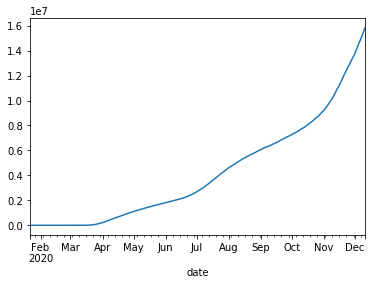

In [47]:
series = read_csv('modeldata.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
series=series['cumulative_cases']
print(series.head())
series.plot()
pyplot.show()

In [48]:
# new_series=series.groupby(['date']).sum()

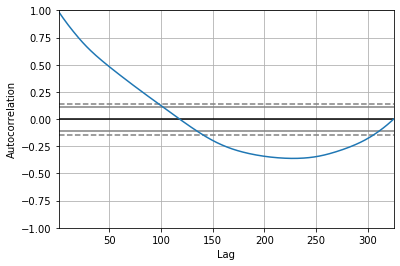

In [49]:
autocorrelation_plot(series)
pyplot.show()

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:     D.cumulative_cases   No. Observations:                  324
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -3444.407
Method:                       css-mle   S.D. of innovations           9936.871
Date:                Sat, 12 Dec 2020   AIC                           6902.813
Time:                        11:30:02   BIC                           6929.278
Sample:                    01-23-2020   HQIC                          6913.377
                         - 12-11-2020                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                      4.89e+04   1.49e+05      0.327      0.743   -2.44e+05    3.42e+05
ar.L1.D.cumulative_cases     0.6198      0.056     11.141      0.000       0.511       0.

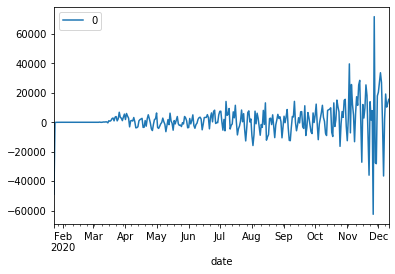

                  0
count    324.000000
mean    1136.017900
std    10251.798661
min   -62576.058061
25%    -1698.273092
50%      110.066280
75%     3804.524429
max    71600.821058


In [50]:
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# residuals.plot(kind='kde')
# pyplot.show()
print(residuals.describe())

predicted=47299.950848, expected=6235808.000000
predicted=42939.802612, expected=6267319.000000
predicted=30738.809936, expected=6290864.000000
predicted=25614.286521, expected=6317709.000000
predicted=32771.887781, expected=6351604.000000
predicted=38695.971271, expected=6387670.000000
predicted=36341.497461, expected=6435109.000000
predicted=42833.673644, expected=6476112.000000
predicted=38019.340467, expected=6510417.000000
predicted=31249.880271, expected=6544259.000000
predicted=32855.882254, expected=6583644.000000
predicted=42679.941315, expected=6622104.000000
predicted=39988.842300, expected=6667026.000000
predicted=42561.598109, expected=6715776.000000
predicted=46307.630531, expected=6758288.000000
predicted=41027.240055, expected=6796732.000000
predicted=36284.294476, expected=6848227.000000
predicted=51076.203482, expected=6887709.000000
predicted=42701.620099, expected=6926290.000000
predicted=37562.375552, expected=6972000.000000
predicted=43857.187711, expected=7020054

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=61364.632143, expected=8092851.000000
predicted=53839.092931, expected=8142205.000000
predicted=49319.950824, expected=8209074.000000
predicted=67745.753896, expected=8270162.000000
predicted=63898.896565, expected=8333188.000000
predicted=61930.924312, expected=8408523.000000
predicted=68123.574900, expected=8489510.000000


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=78881.640532, expected=8572331.000000
predicted=77996.587601, expected=8634133.000000
predicted=58182.416236, expected=8700637.000000
predicted=68017.568398, expected=8776638.000000
predicted=77883.491624, expected=8855322.000000
predicted=81041.121097, expected=8945490.000000
predicted=84048.947620, expected=9044009.000000
predicted=91375.793919, expected=9132946.000000
predicted=84472.016033, expected=9208517.000000
predicted=73313.773405, expected=9292004.000000
predicted=85257.068375, expected=9416557.000000
predicted=125055.593127, expected=9519430.000000
predicted=94211.514301, expected=9645620.000000
predicted=112951.081608, expected=9771328.000000
predicted=112397.490817, expected=9899364.000000
predicted=127456.880967, expected=10009390.000000
predicted=108493.066288, expected=10130600.000000
predicted=121359.500196, expected=10268294.000000
predicted=135983.225653, expected=10411943.000000
predicted=139287.179785, expected=10573090.000000
predicted=151459.381716, ex

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=161910.894001, expected=11053349.000000


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=134690.193115, expected=11211169.000000
predicted=160041.936557, expected=11371743.000000
predicted=162938.676819, expected=11542256.000000
predicted=168153.594125, expected=11730289.000000
predicted=179114.783578, expected=11925807.000000
predicted=189532.325148, expected=12103904.000000
predicted=173974.002255, expected=12246711.000000
predicted=144488.738439, expected=12418226.000000
predicted=177603.809106, expected=12591214.000000
predicted=176210.836221, expected=12772501.000000
predicted=179163.251358, expected=12883155.000000
predicted=120424.621674, expected=13088669.000000
predicted=172627.243827, expected=13244549.000000
predicted=191214.608030, expected=13383182.000000
predicted=135656.056783, expected=13541033.000000
predicted=159149.845931, expected=13721670.000000
predicted=165474.726160, expected=13921777.000000


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=180059.280443, expected=14139457.000000
predicted=199705.981845, expected=14367285.000000
predicted=216995.168573, expected=14581166.000000
predicted=214191.125048, expected=14756830.000000
predicted=190757.742394, expected=14949265.000000
predicted=196278.627630, expected=15165143.000000
predicted=210597.991008, expected=15386410.000000
predicted=210879.430919, expected=15610862.000000
predicted=215552.823541, expected=15842637.000000
Test MSE: 94330057845767.484


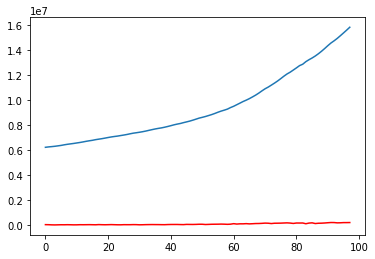

<Figure size 1440x720 with 0 Axes>

In [51]:
X = series.values
size = int(len(X)* 0.70)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.predict(365)
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
plt.figure(figsize=(20,10))
pyplot.show()


In [54]:
# today=len(history)
# today
predict=np.round(output)
predict

array([215553., 215414., 216217., 217341., 216867., 216251., 215947.,
       215888., 215779., 215571., 215343., 215144., 214964., 214779.,
       214588., 214394., 214203., 214014., 213825., 213635., 213446.,
       213257., 213068., 212879., 212691., 212503., 212315., 212127.,
       211939., 211752., 211565., 211378., 211191., 211005., 210818.,
       210632., 210446., 210261., 210075., 209890., 209705., 209520.])

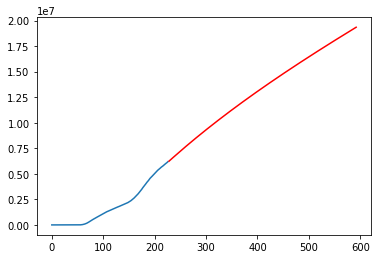

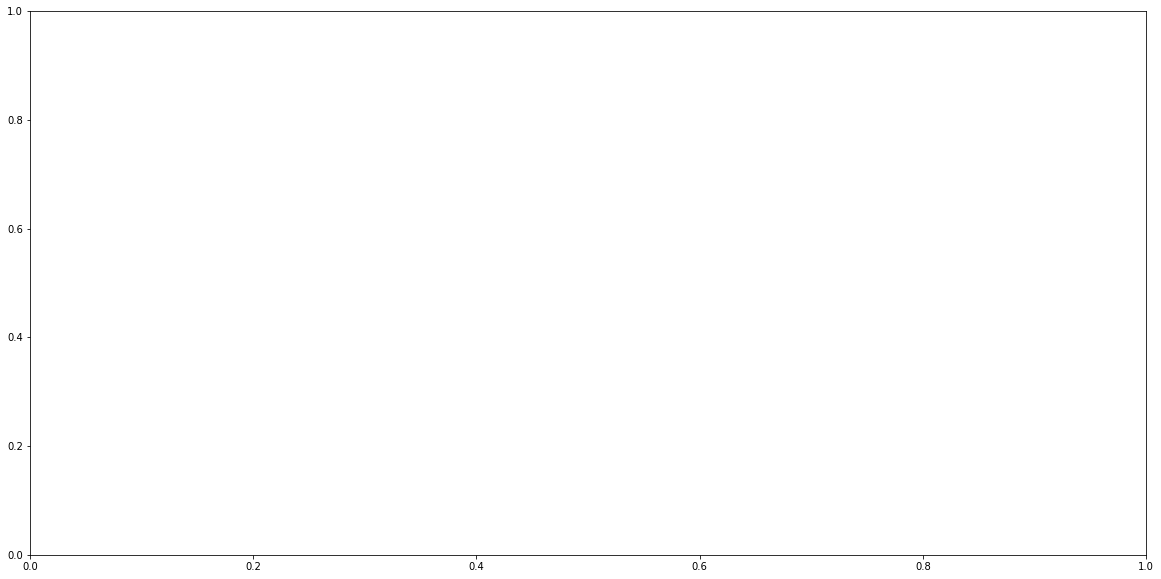

In [31]:
X = series.values
size = int(len(X)* 0.70)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = [today + i for i in range(1,366)]


model = ARIMA(history, order=(5,1,0))
model_fit = model.fit(disp=0)
output = model_fit.forecast(steps=365)[0]
pyplot.plot(history)
pyplot.plot(predictions,output, color='red')
plt.figure(figsize=(20,10))
pyplot.xticks()
pyplot.show()


In [ ]:
data = {'a': np.arange(50),
        'c': np.random.randint(0, 50, 50),
        'd': np.random.randn(50)}
data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 100

plt.scatter('a', 'b', c='c', s='d', data=data)
plt.xlabel('entry a')
plt.ylabel('entry b')
plt.show()